## Tarea 1: Análisis de datos de Unimorph
- Fecha de entrega: martes 5 de octubre.
- Modalidad: crear la carpeta **tarea-1** en su cuenta de github. 
- La tarea es **individual** pero la **discusión grupal es recomendada.**
- Elija una lengua en [datos](https://github.com/orgs/unimorph/repositories). Elija una lengua distinta a la lengua ejemplo (Yanesha)
- En la carpeta "datos", hay archivos para algunas lenguas. Puede elegir otra :)
- **Recomendación:** implemente de forma ordenada y con comentarios. Trate, en lo posible, de poner comentarios en cada línea.
- No duden en preguntar en caso de cualquier problema! :)

## Leemos el archivo
Asumimos que la carpeta tarea-1 tiene adentro dos cosas: archivo de datos (de la lengua elegida) en la carpeta "datos", código en formato ipynb (notebook!). A modo de ejemplo, elegimos **Yanesha** para explicar los pasos de la tarea. 

In [1]:
### importar el documento 'cni'-Ashaninka a python:
import pandas as pd

datos = pd.read_csv('cni', sep='\t', header=None)

### cambiar nombre
datos.columns = ['lemas','inflexiones','códigos']

In [2]:
## vamos a trabajar solo con verbos!

datos = datos[datos['códigos'].str.startswith('V')]

In [3]:
## nuestros datos!!! Cada fila indica una forma original, una inflexión del verbo y las coordenadas de la inflexión.

datos

,lemas,inflexiones,códigos
0,aabintaantsi,aabintaantsi,V;NFIN
1,aabintaantsi,aabintaje,V;NO1PI;PFV;FIN;IRR;LGSPEC2
2,aabintaantsi,aabintaje,V;NO3F;PFV;FIN;IRR;LGSPEC2
3,aabintaantsi,aabintaji,V;NO1PI;PFV;FIN;REAL;LGSPEC2
4,aabintaantsi,aabintaji,V;NO3F;PFV;FIN;REAL;LGSPEC2
...,...,...,...
20065,yotaantsi,piyotake,V;NO2;PFV;FIN;IRR;LGSPEC1
20066,yotaantsi,piyotake,V;NO2;PFV;FIN;REAL;LGSPEC1
20067,yotaantsi,piyote,V;NO2;FIN;IRR
20068,yotaantsi,piyoti,V;NO2;FIN;REAL


### Estos son nuestros datos! 3 listas!

In [4]:
## definamos conjuntos de lemas, inflexiones y códigos para cada lengua :)

#### LEMAS ####
## cni
lemas = list(datos['lemas'])

#### INFLEXIONES ####
## cni
inflexiones = list(datos['inflexiones'])

#### CÓDIGOS ####
## cni
codigos = list(datos['códigos'])

## Preguntas

### 1. ¿Cuántos lemas distintos hay?

In [5]:
## Defina la lista lemas_distintos, que guarda los lemas distintos de la lista lemas
## use un ciclo for para recorrer la lista lemas. 

### sabemos que el número de lemas total es
len (lemas)

5622

In [6]:
### Para obtener la lista de lemas distintos
### Primero, definimos la lista vacía lemas_distintos donde guardaremos elementos distintos
lemas_distintos = []

### Segundo, usamos un ciclo for para recorrer los elementos de la lista "lemas"

for elemento in lemas:
    
### Tercero, para obtener los elementos únicos usamos la operación if para codificar lo siguiente:
### "si el elemento ya está en la lista lemas_distintos, entonces no se guarda"

    if elemento not in lemas_distintos:
        ### guardamos los elementos en lemas_distintos:
        lemas_distintos += [elemento]

In [7]:
### número de lemas distintos
len (lemas_distintos)

150

### 2. ¿Cuántas inflexiones hay por lema distinto?

In [8]:
## Calcule la división entre el número de inflexiones y el número de lemas distintos

### Primero, creamos la lista inflexiones_por_lema_distinto
inflexiones_por_lema_distinto = 0

In [9]:
### realizamos la división 
inflexiones_por_lema_distinto = len (inflexiones) / len (lemas_distintos)

In [10]:
### resultado
inflexiones_por_lema_distinto

37.48

In [11]:
### Es decir, tenemos un promedio de 37.48 inflexiones por lema distinto

### 3. Defina la lista tokens_codigos, en que cada código está tokenizado por ";"

In [12]:
### sabemos que la lista de códigos es el siguiente:
codigos [:5]

['V;NFIN',
 'V;NO1PI;PFV;FIN;IRR;LGSPEC2',
 'V;NO3F;PFV;FIN;IRR;LGSPEC2',
 'V;NO1PI;PFV;FIN;REAL;LGSPEC2',
 'V;NO3F;PFV;FIN;REAL;LGSPEC2']

In [13]:
## use un ciclo for para recorrer la lista codigos. 
## En cada iteración, use split(';') y guarde el resultado en tokens_codigos

### Primero, creamos la lista vacía tokens_codigos para guardar en esta los códigos tokenizados
tokens_codigos = []

In [14]:
### Luego, usamos ciclo for para recorrer los elementos de la lista códigos
for item in codigos:
    ### usamos .split(';') para tokenizar los códigos y los guardamos en la lista "lista_codigo_split"
    lista_codigo_split = item.split (';')
    ### finalmente, guardamos esta lista "lista_codigo_split" en la lista vacía que creamos anteriormente: tokens_codigos
    tokens_codigos += [lista_codigo_split]
    

In [15]:
### resultado: una lista de listas :) 

tokens_codigos [:5]

[['V', 'NFIN'],
 ['V', 'NO1PI', 'PFV', 'FIN', 'IRR', 'LGSPEC2'],
 ['V', 'NO3F', 'PFV', 'FIN', 'IRR', 'LGSPEC2'],
 ['V', 'NO1PI', 'PFV', 'FIN', 'REAL', 'LGSPEC2'],
 ['V', 'NO3F', 'PFV', 'FIN', 'REAL', 'LGSPEC2']]

### 4. ¿Cuál es el número promedio de símbolos usados para describir las inflexiones?

In [16]:
## recorra la lista tokens_codigos con un ciclo for. 
## En cada iteración, guarde el largo de la sublista en promedio_inflexiones.
## Finalmente, divida promedio_inflexiones por el largo de tokens_codigos!

### Primero creamos las listas "numero_simbolos_inflexiones" que guardará  
### el número de símbolos usados para describir las inflexiones

numero_simbolos_inflexiones = 0

### creamos también la lista "promedio_inflexiones" donde se hallará el promedio de símbolos usados para describir las inflexiones. 
### Para eso, tendremos que dividir el número_simbolo_inflexiones entre el largo de tokens_codigos 

promedio_inflexiones = 0


In [17]:
#### En la lista tokens_codigos que ha sido hallado en la anterior pregunta
### están los símbolos usados para describir las inflexiones!
tokens_codigos [:5]

[['V', 'NFIN'],
 ['V', 'NO1PI', 'PFV', 'FIN', 'IRR', 'LGSPEC2'],
 ['V', 'NO3F', 'PFV', 'FIN', 'IRR', 'LGSPEC2'],
 ['V', 'NO1PI', 'PFV', 'FIN', 'REAL', 'LGSPEC2'],
 ['V', 'NO3F', 'PFV', 'FIN', 'REAL', 'LGSPEC2']]

In [18]:
### Primero, usamos ciclo for para recorrer la lista tokens_codigos
for variable in tokens_codigos:
    ## guardamos en N el largo de la sublista "variable"
    N=len(variable)
    ### guardamos N en la lista numero_simbolos_inflexiones
    numero_simbolos_inflexiones += N

In [19]:
### el número de símbolos usados para las inflexiones es
numero_simbolos_inflexiones

29484

In [20]:
### dividimos numero_simbolos_inflexiones por el largo de tokens_codigos para obtener el promedio
promedio_inflexiones = numero_simbolos_inflexiones/len(tokens_codigos)

In [21]:
### resultado
promedio_inflexiones

5.244397011739594

In [22]:
#es decir, por cada inflexión tenemos un promedio de 5.24 símbolos usados

### 5. Ahora, tokens_codigos es una lista de listas. Defina la lista lista_codigos, que guarda todos los strings usados para describir las inflexiones

In [23]:
## use un ciclo for para recorrer la lista tokens_codigos. En cada iteración, use otro ciclo for, que recorra la sublista, y 
## guarde los strings en lista_codigos

### Primero, definimos la lista vacía lista_codigos para guardar los simbolos usados para describir las inflexiones
lista_codigos = []

In [24]:
### Luego, usamos un primer ciclo for para recorrer la lista tokens_codigos
for items in tokens_codigos:
    ### usamos otro ciclo for para recorrer dentro de cada lista "items" los símbolos usados para describir las inflexiones
    for simbolos in items:
        ### guardamos estos símbolos en la lista lista_codigos
        lista_codigos += [simbolos]

In [25]:
### resultado

lista_codigos [:5]

['V', 'NFIN', 'V', 'NO1PI', 'PFV']

### 6. ¿Cuántos símbolos se utilizan para definir las inflexiones?

In [26]:
### Primero, definimos la lista simbolos_distintos para guardae los simbolos distintos de lista_codigos

simbolos_distintos = []

In [27]:
###  Luego, usamos ciclo for para recorrer la lista "lista_codigos"
for elementos in lista_codigos:
### usamos la operación if: si el elemento ya está en la lista simbolos_distintos entonces no lo guardamos 
    if elementos not in simbolos_distintos:
        simbolos_distintos += [elementos]

In [47]:
### resultado
simbolos_distintos

['V',
 'NFIN',
 'NO1PI',
 'PFV',
 'FIN',
 'IRR',
 'LGSPEC2',
 'NO3F',
 'REAL',
 'LGSPEC1',
 'NO1PE',
 'NO1S',
 'NO2',
 'NO3M']

In [29]:
len(simbolos_distintos)

14

### 7. Construya la lista triple_datos en donde cada elemento tiene la forma [lema,inflexión,código]

In [30]:
## recorra las listas usando los índices!
### definimos la lista vacía triple_datos 
triple_datos = []

In [31]:
### PRIMERA PARTE: 
### Concatenar los elementos de lema, inflexión y codigo mediante sus índices.
### Para eso, creamos la lista vacía concatenacion_datos
concatenacion_datos = []
### usamos for índice in range para acceder a los índices de los ementos de la lista
for indice in range(len(lemas)): 
    ### concatenamos cada elemento de lemas, inflexiones y codigos
    concatenacion = lemas[indice]+','+ inflexiones[indice]+ ','+ codigos[indice]
    ### guardamos esto en concatenacion_datos
    concatenacion_datos += [concatenacion]

In [32]:
### obtenemos una lista de strings conformados por lemas, inflexión y código
concatenacion_datos [:5]

['aabintaantsi,aabintaantsi,V;NFIN',
 'aabintaantsi,aabintaje,V;NO1PI;PFV;FIN;IRR;LGSPEC2',
 'aabintaantsi,aabintaje,V;NO3F;PFV;FIN;IRR;LGSPEC2',
 'aabintaantsi,aabintaji,V;NO1PI;PFV;FIN;REAL;LGSPEC2',
 'aabintaantsi,aabintaji,V;NO3F;PFV;FIN;REAL;LGSPEC2']

In [33]:
### SEGUNDA PARTE:
### tenemos que formar una lista de listas en el que lemas, inflexión y código sean strings.
### Para eso usamos .split(',')

### Primeron recorremos la lista concatenacion_datos
for elemento in concatenacion_datos:
### Luego, para que cada elemento sea un string usamos un .split (',')
    lista_datos_split = elemento.split (',')
    ### guardamos
    triple_datos += [lista_datos_split]

In [34]:
### resultado
triple_datos [:5]

[['aabintaantsi', 'aabintaantsi', 'V;NFIN'],
 ['aabintaantsi', 'aabintaje', 'V;NO1PI;PFV;FIN;IRR;LGSPEC2'],
 ['aabintaantsi', 'aabintaje', 'V;NO3F;PFV;FIN;IRR;LGSPEC2'],
 ['aabintaantsi', 'aabintaji', 'V;NO1PI;PFV;FIN;REAL;LGSPEC2'],
 ['aabintaantsi', 'aabintaji', 'V;NO3F;PFV;FIN;REAL;LGSPEC2']]

### 8. ¿Existen códigos para los cuales el lema es igual a su inflexión? Defina la lista lema_igual_inflexion, que en cada posición pone 1 si son iguales, o 0 en otro caso.

In [35]:
## recorra la lista triple_datos. En cada interación, use una condición if. 

### definimos la lista vacía lema_igual_inflexion
lema_igual_inflexion = []

In [36]:
### primero recorremos para acceder a los elementos de la lista triple_datos
for sublista in triple_datos:
    ### luego, usamos otro ciclo for para acceder a los indices dentro de los elementos de la sublista    
    for i in range(len(sublista)):
        ### Ahora, usamos if para realizar la siguiente operación: 
        ### si el lema es igual a la inflexión, poner en cada posición "1"
        if sublista[0] == sublista[1]:
            lema_igual_inflexion += "1"
        ### si el lema no es igual a la inflexión, poner en cada posición "0"
        if not sublista[0] ==sublista[1]:
            lema_igual_inflexion += "0"
                    

In [37]:
### resultado
lema_igual_inflexion [:5]

['1', '1', '1', '0', '0']

### 9. Usemos una librería!

In [38]:
!pip install jellyfish

In [39]:
## la distancia de hamming permite calcular la distancia entre strings. Un alto valor de la distancia de Hamming implica 
## que los strings son distintos

import jellyfish as JF


JF.hamming_distance("a'chenkateñets","a'chenkateñet")

1

In [40]:
## a partir de la lista triple_datos construya la lista distancia_largo_codigos, 
## en que cada elemento tiene la forma [JF.hamming_distance(codigo,inflexión),largo(codigo)]

### Primero, definimos la lista vacía distancia_largo_codigos
distancia_largo_codigos = []

### Luego, usamos un primer ciclo for para acceder a los elementos de la lista triple_datos

for item in triple_datos:
    ### usamos otro ciclo for para acceder a los índices de la sublista item
     for i in range(len(item)):
        ### construimos la lista D en el que el primer valor calcula la distancia entre strings mediante el codigo anterior
        ### y el segundo valor es el largo del código
            D = JF.hamming_distance(item[0], item[1]),len(item[2])
        ### guardamos en la lista distancia_largo_codigos
            distancia_largo_codigos += [D]


In [41]:
distancia_largo_codigos [:5]

[(0, 6), (0, 6), (0, 6), (5, 27), (5, 27)]

### 10. Extraiga dos listas de distancia_largo_codigos: distancias y largo_codigos, que guardan las distancias entre lemas e inflexiones, y el largo de los códigos

In [42]:
### definimos las listas vacías 
distancias = []  ### para guardar el primer valor
largo_codigos = []  ### para guardar el segundo valor

In [43]:
### accedemos a estos valores recorriendo la lista distancia_largo_codigos
for sublista in distancia_largo_codigos:
    ### guardamos los primeros valores en la lista distancias
    distancias += [sublista[0]]
    ### guardamos los segundos valores en al lista largos_codigos
    largo_codigos += [sublista[1]]

In [44]:
distancias [:5]

[0, 0, 0, 5, 5]

In [45]:
largo_codigos [:5]

[6, 6, 6, 27, 27]

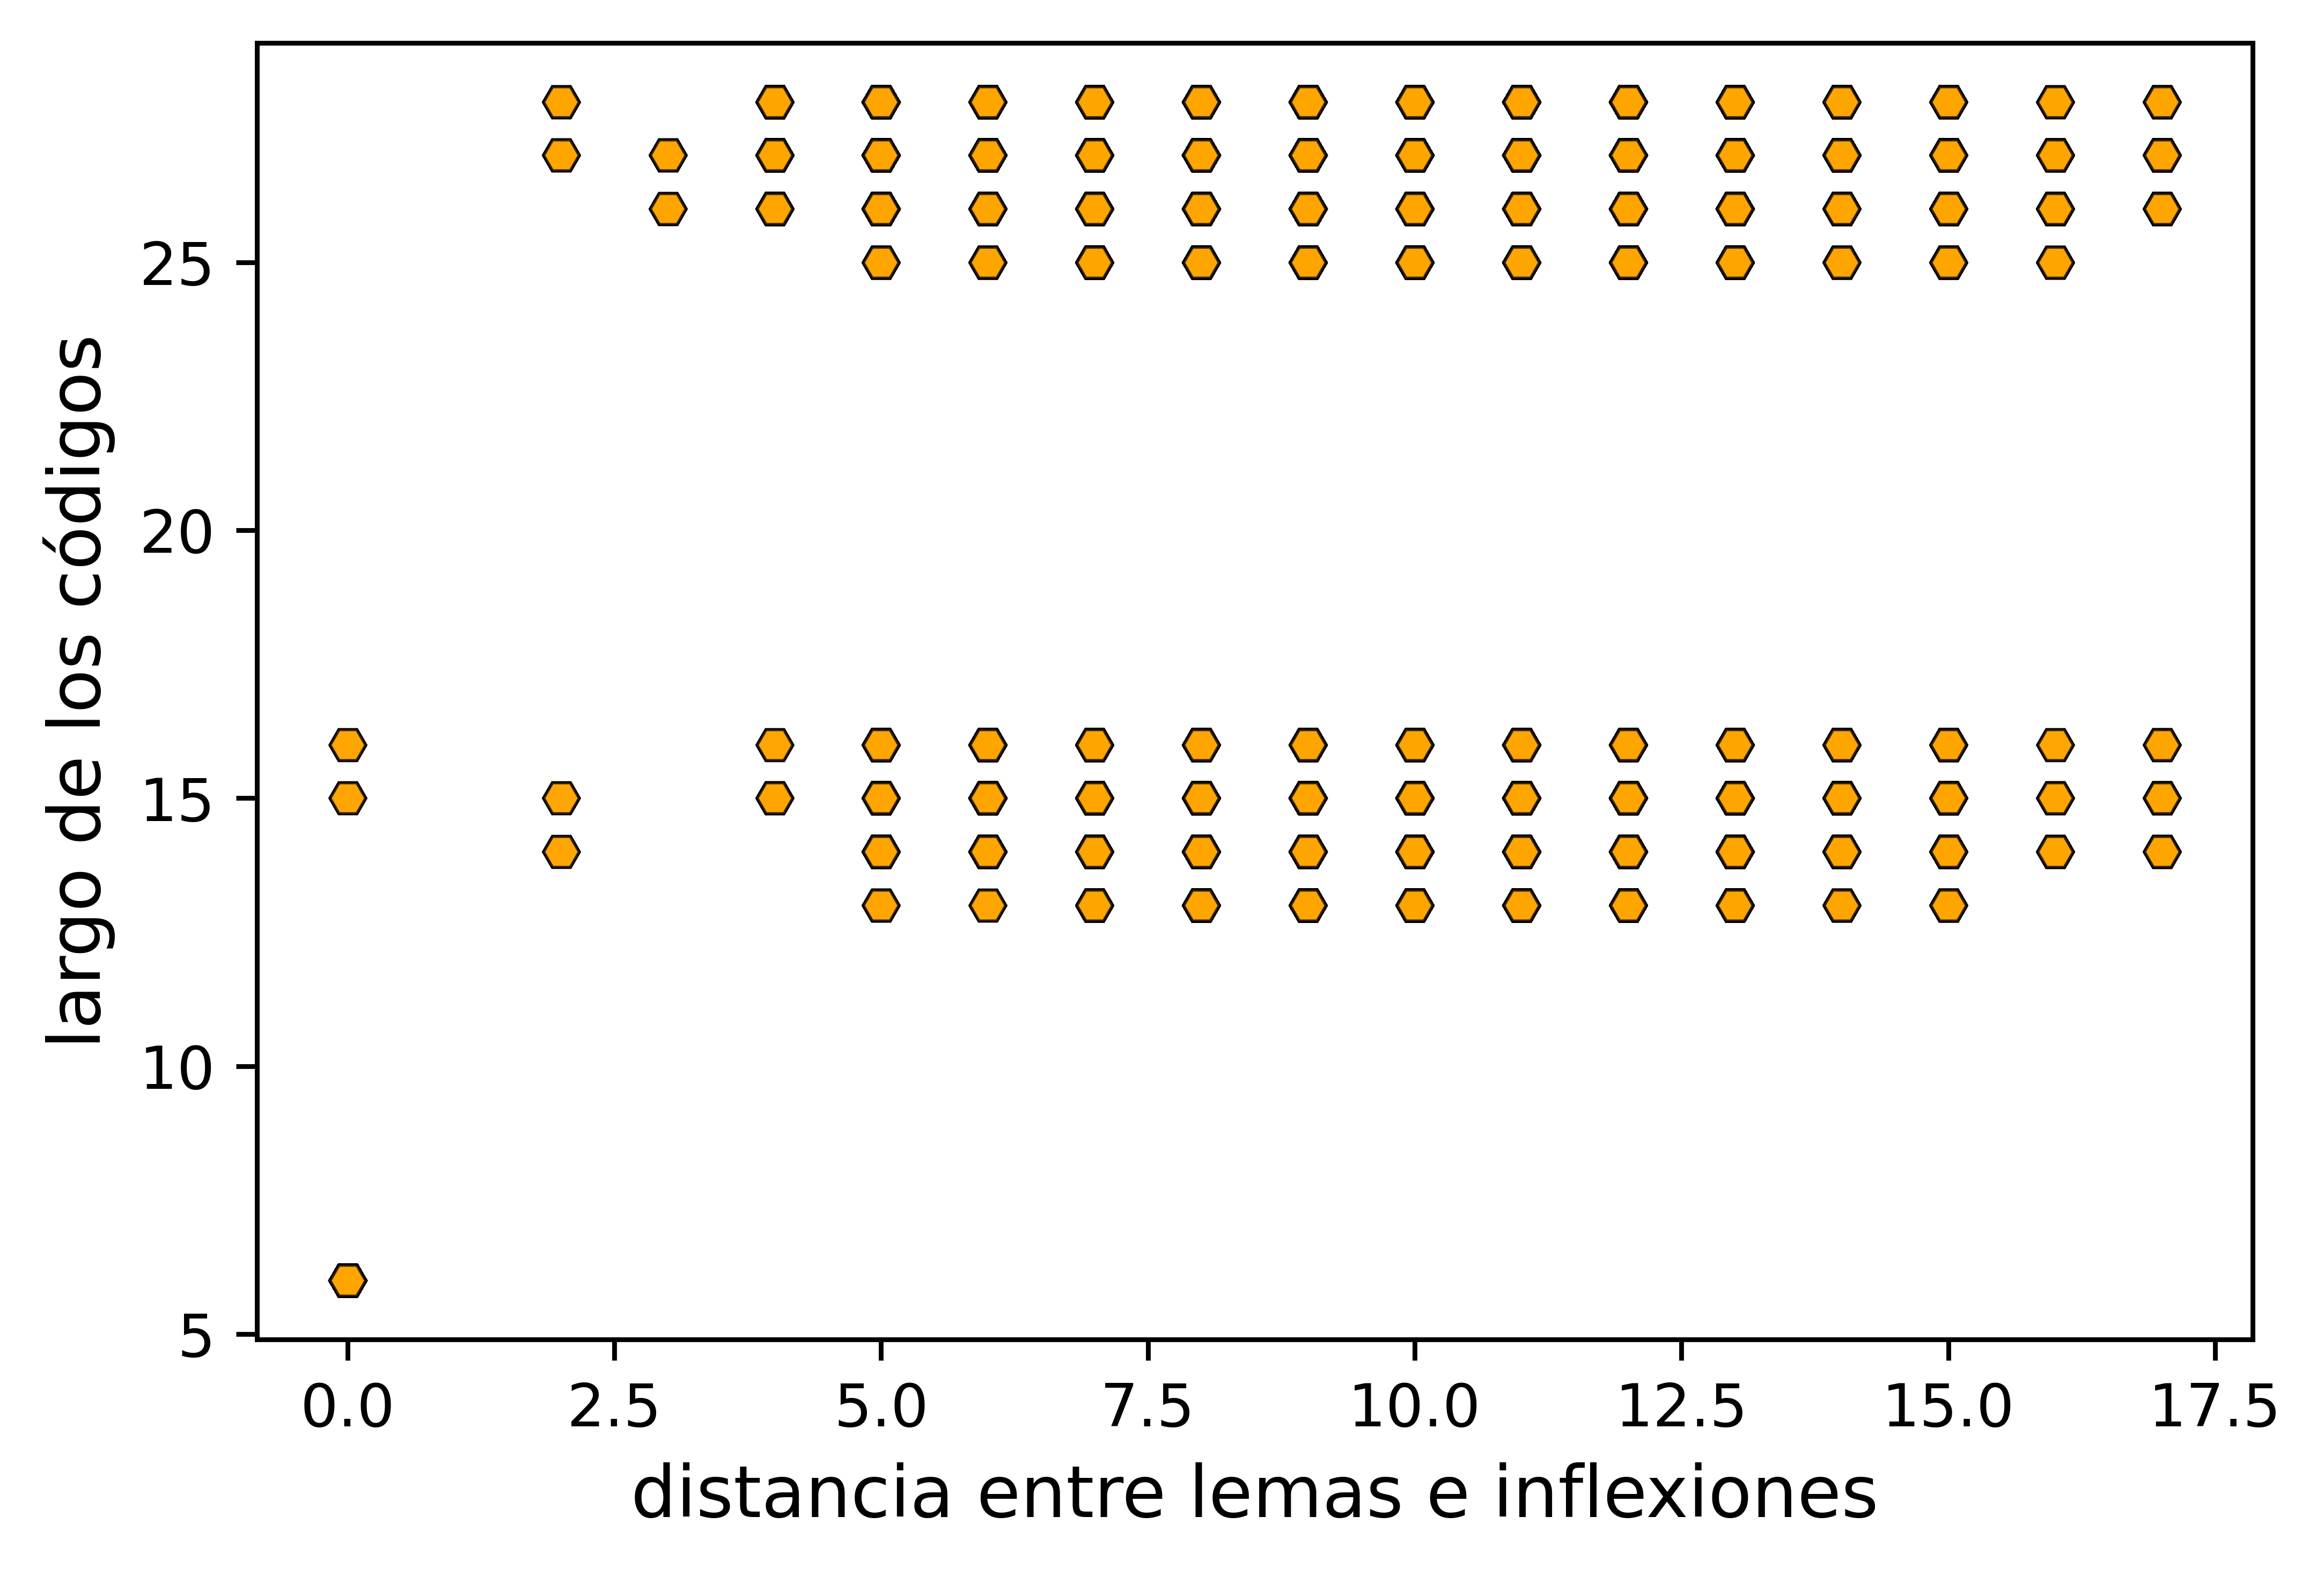

In [46]:
## ejecute el siguiente código!

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
    
ax.plot(distancias,largo_codigos,linewidth=0,marker='H',color='orange',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
plt.ylabel('largo de los códigos',fontsize=12)
plt.xlabel('distancia entre lemas e inflexiones',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('distanciavslargo.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()



### 11. Responda las siguientes preguntas. 
- ¿A partir de los cálculos realizados, qué podemos decir sobre la tipología morfológica de la lengua estudiada? Use en su respuesta algo de los cálculos realizados en relación a inflexiones y lemas. Puede explicar los calculos propuestos de manera informal.
- ¿Qué otros cálculos podrían hacerse?

1. 

A partir de los cálculos se puede concluir que la tipología morfológica de la lengua Ashaninka sería una lengua con tendencia a la síntesis (corpus de verbos).  

Se puede observar en el gráfico que los valores del largo de los códigos presentan una mayor concentración en 15 y 25, y las distancias que hay entre el lema y las inflexiones también suelen concentrarse entre 5 y 15. Esto mostraría que la cantidad de mormemas que se afijan al lema son altos. 

2. 
- se podría hallar el número de morfemas de cada inflexión 
- obtener la cantidad de listas cuyos lemas e inflexiones son distintos, pero los códigos similares: [['aabintaantsi', 'aabintaantsi', 'V;NFIN'], ['aantsi', 'aantsi', 'V;NFIN']...]